# Regression models


hello notebook
(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


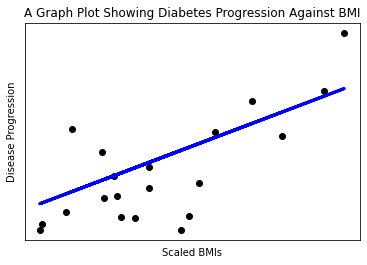

      Month               Package  Low Price  High Price  Price
70        9  1 1/9 bushel cartons      15.00        15.0  13.50
71        9  1 1/9 bushel cartons      18.00        18.0  16.20
72       10  1 1/9 bushel cartons      18.00        18.0  16.20
73       10  1 1/9 bushel cartons      17.00        17.0  15.30
74       10  1 1/9 bushel cartons      15.00        15.0  13.50
...     ...                   ...        ...         ...    ...
1738      9    1/2 bushel cartons      15.00        15.0  30.00
1739      9    1/2 bushel cartons      13.75        15.0  28.75
1740      9    1/2 bushel cartons      10.75        15.0  25.75
1741      9    1/2 bushel cartons      12.00        12.0  24.00
1742      9    1/2 bushel cartons      12.00        12.0  24.00

[415 rows x 5 columns]


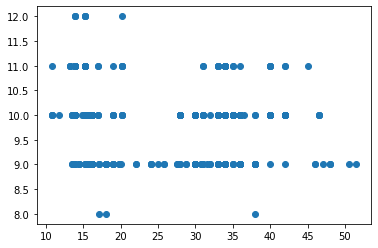

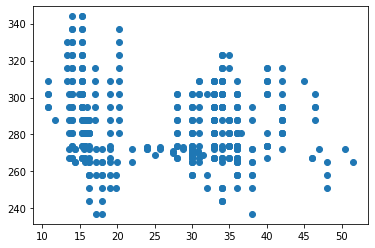

In [7]:
from datetime import datetime

print('hello notebook')

# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
# The input return_X_y=True signals that
# X will be a data matrix, and y will be the regression target.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

print(diabetes_X.shape)
print(diabetes_X[0])

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')

plt.xticks(())
plt.yticks(())

plt.show()

# Exercise - analyze the pumpkin data
import pandas as pd

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
# Add a filter at the top of the file, under the initial .csv import:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()  # Use the head() function to view the first five rows.
pumpkins.isnull().sum()  # Check if there is missing data in the current dataframe
# drop several of its columns, using drop(), keeping only the columns you need
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)
pumpkins.head()
# pumpkins.isnull().sum() # there is no missing data for dates or prices.
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)
print(new_pumpkins)
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()
# new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
# plt.ylabel("Pumpkin Price")

# Build a regression model using Scikit-learn: regression four ways

# It is typical of Least-Squares Regression to draw this type of line. The term 'least-squares' means that all the datapoints surrounding the regression line are squared and then added up. Ideally, that final sum is as small as possible, because we want a low number of errors, or least-squares.
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
plt.scatter(price, day_of_year)
plt.show()

